<center><h1><span style="color:red">
Análise de Salários da População de Chicago - EUA
</span></h1></center>

<p><b>by Felix</b></p>

<center><h2 style="color:red">Descrição do Caso</h2></center>

</br></br>

<p style="color:blue">O arquivo <i>salarios.csv</i> consiste num dataset de salários da população trabalhadora de Chicago. Sua função é realizar uma análise de dados que consiga encontrar os quinze registros com os maiores/menores salários, salvá-los em um novo arquivo csv (separados) e montar gráficos demonstrativos. Resumidamente, sua missão é:</p>

</br></br>

<ol style="color:blue">
    <li>Salvar num arquivo <i>csv</i> os quinze registros com os maiores salários;</li>
    <li>Salvar num arquivo <i>csv</i> os quinze registros com os menores salários;</li>
    <li>Criar um gráfico de barras para cada arquivo criado anteriormente (passos 1 e 2) e depois um gráfico de linhas destacando as médias dos salários contidos em ambos os arquivos;</li>
    <li>Unir ambos os arquivos csv's num único <i>JSON</i>;</li>
    <li>Salvar os dados num arquivo <i>txt</i>.</li>
</ol>

</br></br>
<hr>
</br></br>

<center><h2 style="color:red">Estrutura do Arquivo CSV</h2></center>

</br></br>

<table style="border-collapse: collapse; border: 1px solid black">
    <tr>
        <th style="text-align:center; border-collapse: collapse; border: 1px solid black">Nome/Name</th>
        <th style="text-align:center; border-collapse: collapse; border: 1px solid black">Cargo/Position Title</th>
        <th style="text-align:center; border-collapse: collapse; border: 1px solid black">Departamento/Department</th>
        <th style="text-align:center; border-collapse: collapse; border: 1px solid black">Salário Anual/Employee Annual Salary</th>
    </tr>
    <tr>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">Felix</td>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">Cientista de Dados</td>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">Financeiro</td>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">20000</td>
    </tr>
    <tr>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">Gui</td>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">Programador Backend</td>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">Recursos Humanos</td>
        <td style="text-align:center; border-collapse: collapse; border: 1px solid black">21000</td>
    </tr>
</table>

</br></br>
<hr>
</br></br>

<h3 style="color:red">** Ferramentas **</h3>

In [1]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import csv, json
import numpy as np

In [2]:
# Funções
def Limpeza_Salario(lista):
    """Converte a coluna de salários de string para float"""
    index = 0
    for linha in lista: 
        lista[index][3] = float(linha[3].replace('$', ''))
        index += 1
        
def Extracao_Salario(lista):
    """Retorna uma lista contendo apenas os salários"""
    salarios = []
    for linha in lista: salarios.append(linha[3])
    return salarios
    
def Extracao_Nome_Salario(lista):
    """Retorna duas listas: uma contendo os nomes dos trabalhadores, a outra, os salários"""
    nomes, salarios = [], []
    
    for linha in lista: 
        linha[0] = linha[0].split(',')[0].capitalize()
        nomes.append(linha[0])
        salarios.append(linha[3])
        
    return nomes, salarios

def Separacao_Dados(lista):
    """Retorna quatro listas: uma para os nomes, outra para cargos, outra para departamentos e a última para os salários"""
    nomes, cargos, departamentos, salarios = [], [], [], []
    
    for linha in lista:
        nomes.append(linha[0])
        cargos.append(linha[1])
        departamentos.append(linha[2])
        salarios.append(linha[3])
        
    return nomes, cargos, departamentos, salarios

In [3]:
# Leitura do arquivo 'salarios.csv'
arquivo = pd.read_csv('arquivos/salarios.csv')
arquivo.dropna(inplace = True) # retira 'null values'
arquivo.describe(include = ['object', 'float']) # 'include' considera os tipos de dados para análise. Por padrão, o 'describe'
# opta por valores numéricos, logo, peço para considerar objetos (strings) e floats. 'NaN' é utilizado quando a coluna não
# possui tal dado relacionado

,Name,Position Title,Department,Employee Annual Salary
count,32179,32179,32179,32179.000000
unique,31891,1094,35,NaN
top,"RIVERA, RICARDO",POLICE OFFICER,POLICE,NaN
freq,4,9488,13569,NaN
mean,NaN,NaN,NaN,79167.171330
std,NaN,NaN,NaN,24463.054227
min,NaN,NaN,NaN,0.960000
25%,NaN,NaN,NaN,69888.000000
50%,NaN,NaN,NaN,83616.000000
75%,NaN,NaN,NaN,91764.000000


<h3 style='color:red'>0) Limpeza dos Dados</h3>

In [ ]:
arquivo = arquivo.values.tolist() # transforma tabela em lista
# Limpeza_Salario(arquivo) # retira o cifrão da coluna do salário e transforma o dado em float

In [ ]:
# reescrita do arquivo com a coluna de salário limpa
with open('arquivos/salarios.csv', 'w', newline='') as f:
    escrita = csv.writer(f)
    escrita.writerow(['Name', 'Position Title', 'Department', 'Employee Annual Salary'])
    for linha in arquivo: escrita.writerow(linha)

<h3 style="color:red">
1) Encontrando Quinze Maiores Salários
</h3>

In [4]:
arquivo = arquivo.sort_values(by = 'Employee Annual Salary', ascending = False) # ascending: False -> decrescente, True -> crescente
arquivo = arquivo.drop_duplicates(subset = 'Employee Annual Salary') # desconsidera dados repetidos
arquivo.head(10)

,Name,Position Title,Department,Employee Annual Salary
18037,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004.0
7978,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210.0
25620,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728.0
31709,"WYSINGER, ALFONZA",FIRST DEPUTY SUPERINTENDENT,POLICE,197736.0
29023,"TRACY, ROBERT J",CHIEF,POLICE,194256.0
8942,"FORD II, RICHARD C",DEPUTY FIRE COMMISSIONER,FIRE,187680.0
8063,"ESCALANTE, JOHN J",CHIEF,POLICE,185364.0
9030,"FOX, MICHAEL W",ASST DEPUTY FIRE COMMISSIONER,FIRE,185352.0
19722,"MORITA, JULIA Y",COMMISSIONER OF HEALTH,HEALTH,177000.0
25921,"SCHRADER, LISA P",CHIEF OF STAFF,MAYOR'S OFFICE,174996.0


In [5]:
maiores_salarios = arquivo.head(10).values.tolist()

with open('arquivos/maiores_salarios.csv', 'w', newline = '') as f:
    escrita = csv.writer(f)
    escrita.writerow(['Name', 'Position Title', 'Department', 'Employee Annual Salary'])
    for linha in maiores_salarios: escrita.writerow(linha)
        
del maiores_salarios

<h3 style="color:red">
2) Encontrando Quinze Menores Salários
</h3>

In [6]:
arquivo = arquivo.sort_values(by = 'Employee Annual Salary', ascending = True)
arquivo = arquivo.drop_duplicates(subset = 'Employee Annual Salary')
arquivo.head(10)

,Name,Position Title,Department,Employee Annual Salary
15109,"KOCH, STEVEN",ADMINISTRATIVE SECRETARY,MAYOR'S OFFICE,0.96
4502,"CHARLESTON, EITHELL A",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00
952,"ARMSTRONG, OTIS",ALDERMANIC AIDE,CITY COUNCIL,5200.00
6320,"DATRO, BLANCA E",LIBRARY PAGE,PUBLIC LIBRARY,6203.60
14010,"JONES, ERNESTINE",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,8580.00
26922,"SMITH, KELLY",STUDENT INTERN,FINANCE,8840.00
31933,"ZAMAYOA, ALYSSA-MARIE",PROGRAM AIDE,POLICE,9360.00
11783,"HAYES, PATRICIA S",HOSPITALITY WORKER,FAMILY & SUPPORT,9516.00
14059,"JONES, LACINDA",STUDENT INTERN,HUMAN RESOURCES,9880.00
9844,"GEERS, DIANE M",ALDERMANIC AIDE,CITY COUNCIL,10400.00


In [7]:
menores_salarios = arquivo.head(10).values.tolist()

with open('arquivos/menores_salarios.csv', 'w', newline = '') as f:
    escrita = csv.writer(f)
    escrita.writerow(['Name', 'Position Title', 'Department', 'Employee Annual Salary'])
    for linha in menores_salarios: escrita.writerow(linha)
        
del menores_salarios, arquivo

<h3 style="color:red">
3) Gráficos
</h3>

In [8]:
# Lendo arquivos
maiores_salarios = Extracao_Salario(pd.read_csv('arquivos/maiores_salarios.csv').values.tolist())
menores_salarios = Extracao_Salario(pd.read_csv('arquivos/menores_salarios.csv').values.tolist())

In [9]:
# Preparando eixos dos gráficos
eixo_x1 = np.arange(1, 11, 1)
eixo_y1 = np.array(maiores_salarios)

eixo_x2 = np.arange(11, 21, 1)
eixo_y2 = np.array(menores_salarios)

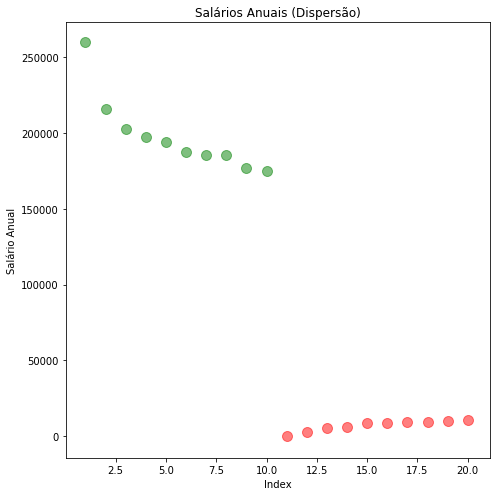

In [10]:
# Gráfico de Dispersão
plt.figure(figsize = (7,7))

plt.title('Salários Anuais (Dispersão)')
plt.xlabel('Index')
plt.ylabel('Salário Anual')

plt.scatter(eixo_x1, eixo_y1, color = 'green', s = 100, alpha = 0.5)
plt.scatter(eixo_x2, eixo_y2, color = 'red', s = 100, alpha = 0.5)

plt.tight_layout()

In [11]:
del maiores_salarios, menores_salarios, eixo_x1, eixo_x2, eixo_y1, eixo_y2

In [12]:
# Lendo arquivos
maiores_nomes, maiores_salarios = Extracao_Nome_Salario(pd.read_csv('arquivos/maiores_salarios.csv').values.tolist())
menores_nomes, menores_salarios = Extracao_Nome_Salario(pd.read_csv('arquivos/menores_salarios.csv').values.tolist())

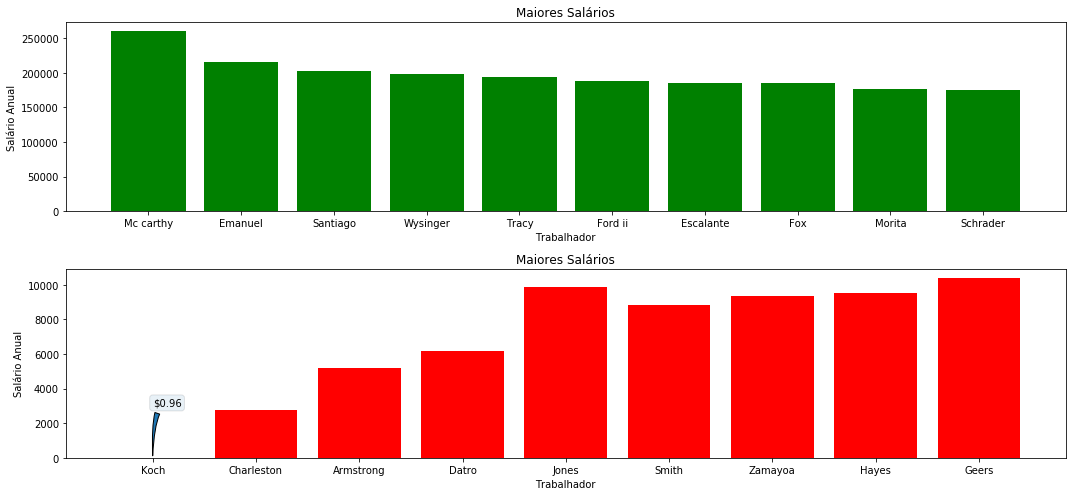

In [13]:
# Gráficos de Barras
plano, dimensoes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))

# Maiores Salários
dimensoes[0].set_title('Maiores Salários')
dimensoes[0].set_xlabel('Trabalhador')
dimensoes[0].set_ylabel('Salário Anual')

dimensoes[0].bar(maiores_nomes, maiores_salarios, color = 'green')

# Menores Salários
dimensoes[1].set_title('Maiores Salários')
dimensoes[1].set_xlabel('Trabalhador')
dimensoes[1].set_ylabel('Salário Anual')

dimensoes[1].bar(menores_nomes, menores_salarios, color = 'red')

dimensoes[1].annotate('$0.96', 
                      xy = (menores_nomes[0], menores_salarios[0]),
                      xytext = (menores_nomes[0], 3000),
                      arrowprops=dict(arrowstyle="wedge, tail_width = 0.5",
                            connectionstyle="angle3,angleA=0,angleB=-90"),
                     bbox=dict(boxstyle="round", alpha=0.1))

# Exibição dos Gráficos
plano.tight_layout()

In [14]:
del maiores_nomes, menores_nomes, maiores_salarios, menores_salarios

<h3 style="color:red">
4) Conversão dos Dados para JSON
</h3>

In [15]:
#Lendo arquivos e unindo-os numa única lista
maiores_salarios = pd.read_csv('arquivos/maiores_salarios.csv').values.tolist()
menores_salarios = pd.read_csv('arquivos/menores_salarios.csv').values.tolist()
dataset = maiores_salarios + menores_salarios

In [16]:
# Criando dictionary e passando chaves/valores
dict = {}
nomes, cargos, departamentos, salarios = Separacao_Dados(dataset)

dict['Name'] = nomes
dict['Position Title'] = cargos
dict['Department'] = departamentos
dict['Employee Annual Salary'] = salarios

In [17]:
# Criando Json
arquivo = json.dumps(dict)

with open('arquivos/salarios.json', 'w', newline = '') as f:
    f.write(arquivo)

In [18]:
# Lendo Json
with open('arquivos/salarios.json', 'r', newline = '') as f:
    leitura = f.read()
    dados = json.loads(leitura)
    
    for chave in dados.keys(): print('{chaves} : {valores}\n'.format(chaves = chave, valores = dados[chave]))

Name : ['MC CARTHY,  GARRY F', 'EMANUEL,  RAHM', 'SANTIAGO,  JOSE A', 'WYSINGER,  ALFONZA', 'TRACY,  ROBERT J', 'FORD II,  RICHARD C', 'ESCALANTE,  JOHN J', 'FOX,  MICHAEL W', 'MORITA,  JULIA Y', 'SCHRADER,  LISA P', 'KOCH,  STEVEN', 'CHARLESTON,  EITHELL A', 'ARMSTRONG,  OTIS', 'DATRO,  BLANCA E', 'JONES,  ERNESTINE', 'SMITH,  KELLY', 'ZAMAYOA,  ALYSSA-MARIE', 'HAYES,  PATRICIA S', 'JONES,  LACINDA', 'GEERS,  DIANE M']

Position Title : ['SUPERINTENDENT OF POLICE', 'MAYOR', 'FIRE COMMISSIONER', 'FIRST DEPUTY SUPERINTENDENT', 'CHIEF', 'DEPUTY FIRE COMMISSIONER', 'CHIEF', 'ASST DEPUTY FIRE COMMISSIONER', 'COMMISSIONER OF HEALTH', 'CHIEF OF STAFF', 'ADMINISTRATIVE SECRETARY', 'FOSTER GRANDPARENT', 'ALDERMANIC AIDE', 'LIBRARY PAGE', 'TITLE V PROGRAM TRAINEE I', 'STUDENT INTERN', 'PROGRAM AIDE', 'HOSPITALITY WORKER', 'STUDENT INTERN', 'ALDERMANIC AIDE']

Department : ['POLICE', "MAYOR'S OFFICE", 'FIRE', 'POLICE', 'POLICE', 'FIRE', 'POLICE', 'FIRE', 'HEALTH', "MAYOR'S OFFICE", "MAYOR'S OFFI

In [19]:
del maiores_salarios, menores_salarios, dataset, dict, nomes, cargos, departamentos, salarios, arquivo

<h3 style="color:red">
5) Salvando dados do JSON num txt
</h3>

In [20]:
# Lendo o arquivo Json
arquivo = None

with open('arquivos/salarios.json', 'r', newline = '') as f:
    arquivo = f.read()
    arquivo = json.loads(arquivo)

In [21]:
# Separando dados do Json numa lista
dados = []
for tipo_dado in arquivo.keys(): dados.append('{chave} = {valor}'.format(chave = tipo_dado, valor = arquivo[tipo_dado]))

In [22]:
# Salvando dados no txt
with open('arquivos/salarios.txt', 'w', newline = '') as f: 
    for elemento in dados: f.write(elemento + '\n\n')

In [23]:
del arquivo, dados